In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [37]:
d=pd.read_csv('abalone.csv')
d.columns=['sex','Length','diamater','height','whole weight','shucked weight','viscera weight','shell weight','rings']
df=pd.DataFrame(d)

In [39]:
df.columns

Index(['sex', 'Length', 'diamater', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')

In [40]:
df

,sex,Length,diamater,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [41]:
df.isnull().sum()

sex               0
Length            0
diamater          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

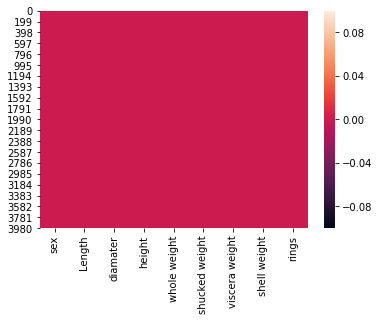

In [43]:
sns.heatmap(df.isnull())

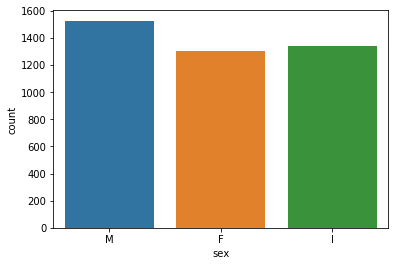

In [46]:
sns.countplot(df['sex'])

In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['sex']

0       2
1       0
2       2
3       1
4       1
       ..
4171    0
4172    2
4173    2
4174    0
4175    2
Name: sex, Length: 4176, dtype: int32

In [50]:
df

,sex,Length,diamater,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [51]:
dfcor=df.corr()
dfcor

,sex,Length,diamater,height,whole weight,shucked weight,viscera weight,shell weight,rings
sex,1.000000,-0.035915,-0.038762,-0.041796,-0.021219,-0.001205,-0.031873,-0.034686,-0.035076
Length,-0.035915,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diamater,-0.038762,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,-0.041796,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole weight,-0.021219,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked weight,-0.001205,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera weight,-0.031873,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell weight,-0.034686,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings,-0.035076,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


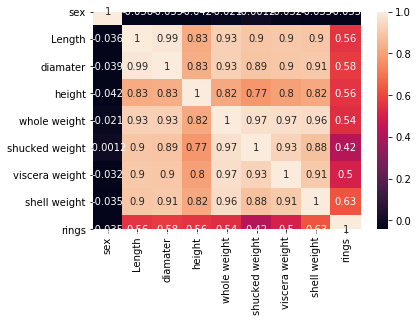

In [53]:
sns.heatmap(dfcor,annot=True)

In [54]:
df.skew()

sex              -0.097729
Length           -0.640240
diamater         -0.609457
height            3.129241
whole weight      0.530576
shucked weight    0.718724
viscera weight    0.591463
shell weight      0.620547
rings             1.115157
dtype: float64

In [56]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [57]:
df.skew()

sex              -0.097729
Length           -0.640240
diamater         -0.609457
height            1.099478
whole weight      0.530576
shucked weight    0.306070
viscera weight    0.375234
shell weight      0.314939
rings            -0.061065
dtype: float64

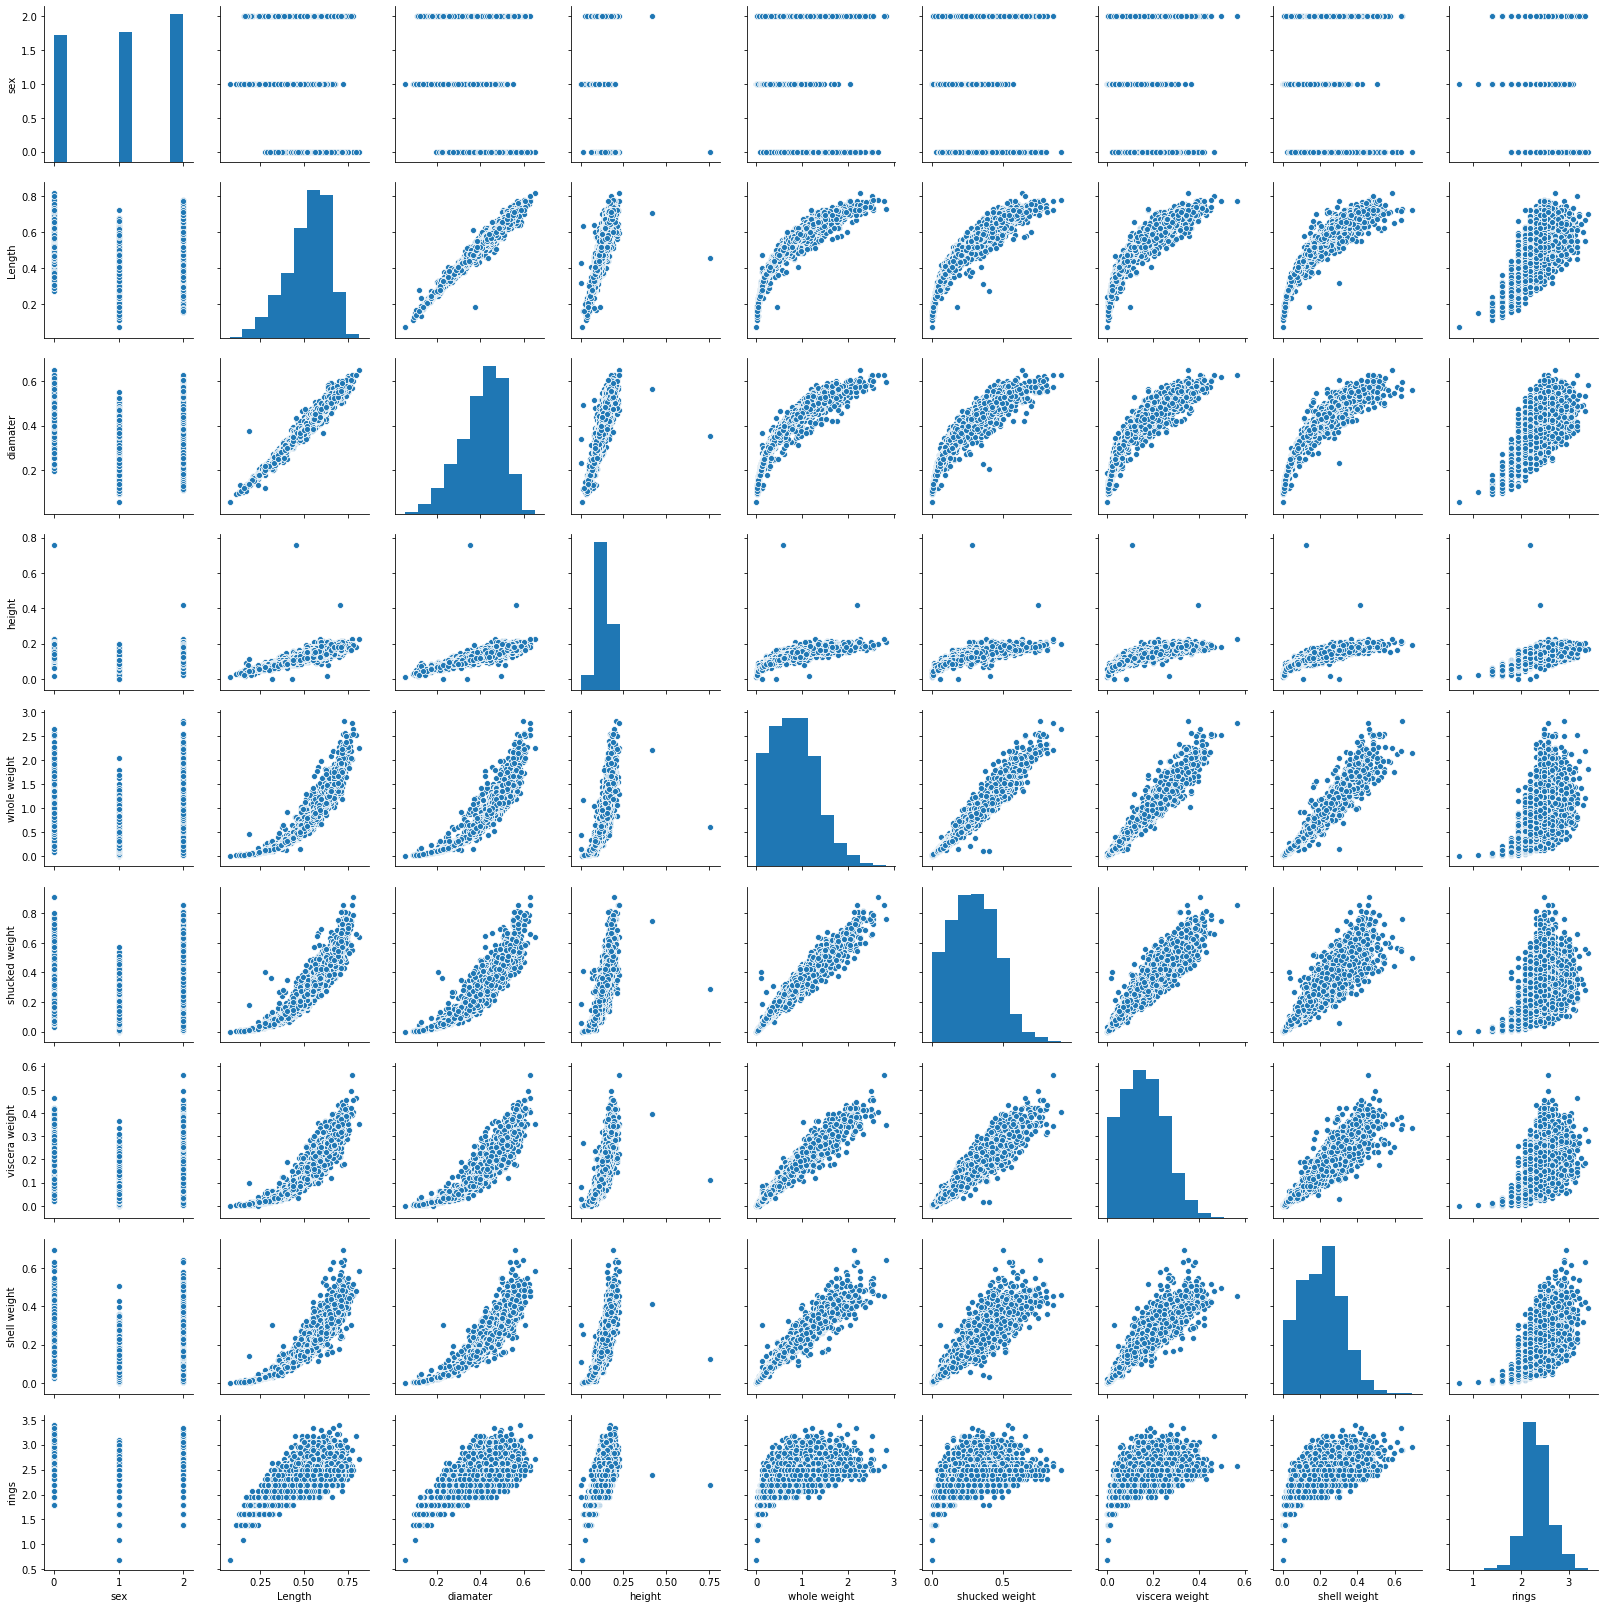

In [58]:
sns.pairplot(df)

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,sex,Length,diamater,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659,2.079442
1,0,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620,2.302585
2,2,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100,2.397895
3,1,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541,2.079442
4,1,0.425,0.300,0.090754,0.3515,0.131905,0.074644,0.113329,2.197225
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.152721,0.8870,0.314811,0.214305,0.222343,2.484907
4172,2,0.590,0.440,0.126633,0.9660,0.363948,0.194332,0.231508,2.397895
4173,2,0.600,0.475,0.186480,1.1760,0.422322,0.252702,0.268499,2.302585
4174,0,0.625,0.485,0.139762,1.0945,0.425921,0.231905,0.259283,2.397895


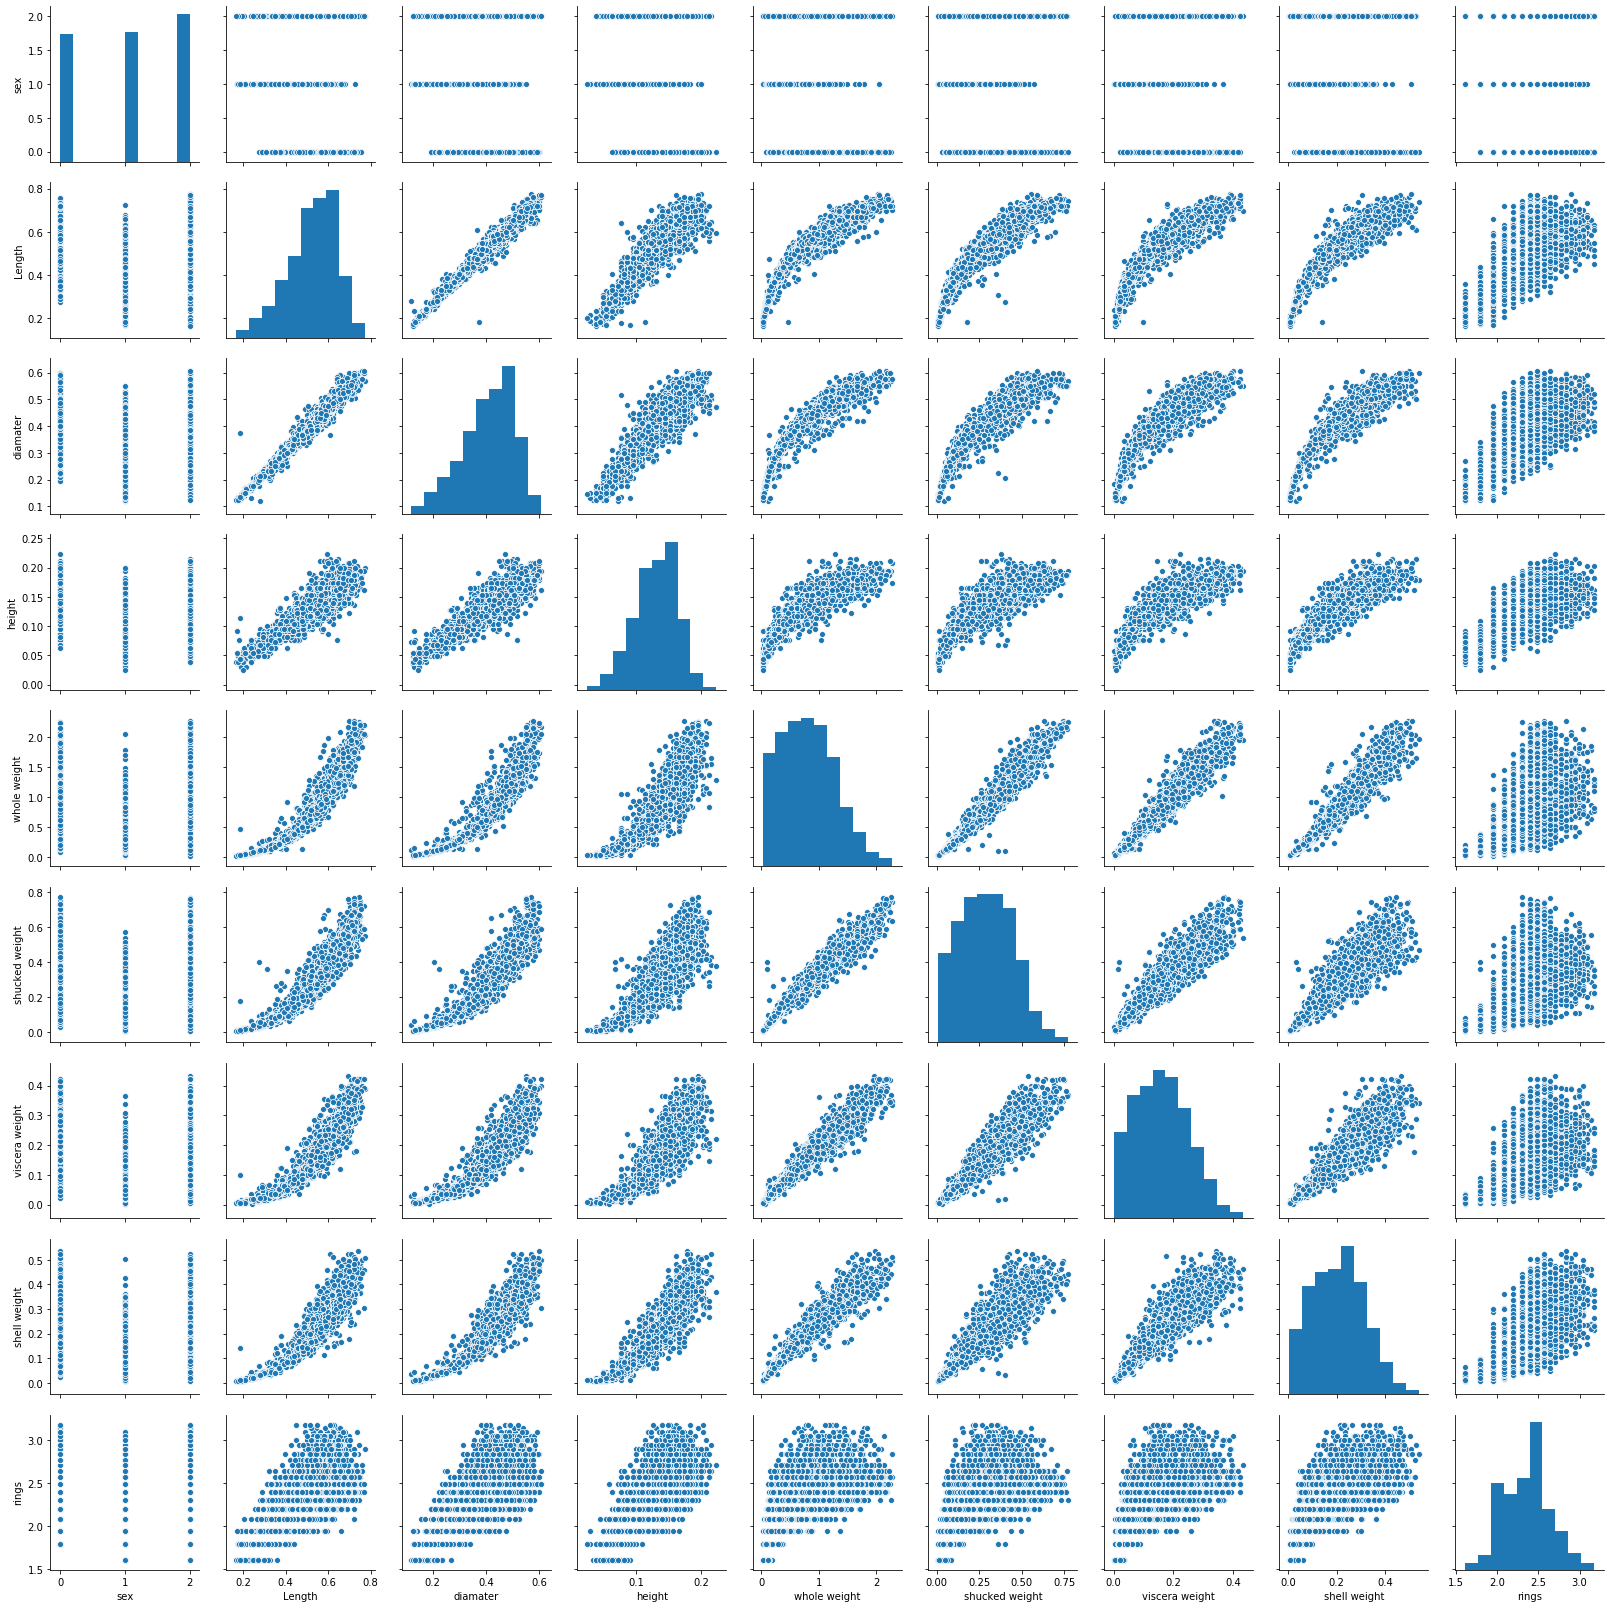

In [61]:
sns.pairplot(df_new)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [67]:
x=df_new.iloc[:,:-1]
x

,sex,Length,diamater,height,whole weight,shucked weight,viscera weight,shell weight
0,2,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659
1,0,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620
2,2,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100
3,1,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541
4,1,0.425,0.300,0.090754,0.3515,0.131905,0.074644,0.113329
...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.152721,0.8870,0.314811,0.214305,0.222343
4172,2,0.590,0.440,0.126633,0.9660,0.363948,0.194332,0.231508
4173,2,0.600,0.475,0.186480,1.1760,0.422322,0.252702,0.268499
4174,0,0.625,0.485,0.139762,1.0945,0.425921,0.231905,0.259283


In [68]:
y=df_new.iloc[:,-1]
y

0       2.079442
1       2.302585
2       2.397895
3       2.079442
4       2.197225
          ...   
4171    2.484907
4172    2.397895
4173    2.302585
4174    2.397895
4175    2.564949
Name: rings, Length: 4101, dtype: float64

In [78]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x

array([[ 1.15384487, -1.51065135, -1.49782293, ..., -1.28904342,
        -1.28465792, -1.31336495],
       [-1.27776758,  0.04774322,  0.1234742 , ..., -0.41842972,
        -0.32280948, -0.14999401],
       [ 1.15384487, -0.73145406, -0.45182478, ..., -0.63481726,
        -0.5988151 , -0.5901313 ],
       ...,
       [ 1.15384487,  0.65378556,  0.69877318, ...,  0.84692182,
         1.03943709,  0.58683732],
       [-1.27776758,  0.87022925,  0.803373  , ...,  0.87039629,
         0.80404957,  0.49963628],
       [ 1.15384487,  1.60613779,  1.5355717 , ...,  2.4332202 ,
         1.79596332,  1.85111473]])

In [104]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
            
        print('max_r2_score corresponding to',final_r_state,'is',max_r_score)

In [105]:
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.5638652058688192
max_r2_score corresponding to 42 is 0.5638652058688192
r2 score corresponding to 43 is 0.573128358594422
max_r2_score corresponding to 43 is 0.573128358594422
r2 score corresponding to 44 is 0.5716786282925602
max_r2_score corresponding to 43 is 0.573128358594422
r2 score corresponding to 45 is 0.5843454962059769
max_r2_score corresponding to 45 is 0.5843454962059769
r2 score corresponding to 46 is 0.5719761779220462
max_r2_score corresponding to 45 is 0.5843454962059769
r2 score corresponding to 47 is 0.5695199145791185
max_r2_score corresponding to 45 is 0.5843454962059769
r2 score corresponding to 48 is 0.561075057581393
max_r2_score corresponding to 45 is 0.5843454962059769
r2 score corresponding to 49 is 0.5625266632684734
max_r2_score corresponding to 45 is 0.5843454962059769
r2 score corresponding to 50 is 0.5870462689369593
max_r2_score corresponding to 50 is 0.5870462689369593
r2 score corresponding to 51 is 0.5776587906421229

In [106]:
from sklearn.model_selection import cross_val_score
print('Mean',cross_val_score(lreg,x,y,scoring='r2',cv=5).mean())
print('STD Deviation',cross_val_score(lreg,x,y,scoring='r2',cv=5).std())

Mean 0.48365616166053693
STD Deviation 0.07582684697812792


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,30)}
gknr=GridSearchCV(knr,parameters,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [108]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.5946254271835774
max_r2_score corresponding to 42 is 0.5946254271835774
r2 score corresponding to 43 is 0.5947598410925348
max_r2_score corresponding to 43 is 0.5947598410925348
r2 score corresponding to 44 is 0.5838629154674961
max_r2_score corresponding to 43 is 0.5947598410925348
r2 score corresponding to 45 is 0.5859601716871778
max_r2_score corresponding to 43 is 0.5947598410925348
r2 score corresponding to 46 is 0.578090702474758
max_r2_score corresponding to 43 is 0.5947598410925348
r2 score corresponding to 47 is 0.6005145451475372
max_r2_score corresponding to 47 is 0.6005145451475372
r2 score corresponding to 48 is 0.5980346989245078
max_r2_score corresponding to 47 is 0.6005145451475372
r2 score corresponding to 49 is 0.5749445144540806
max_r2_score corresponding to 47 is 0.6005145451475372
r2 score corresponding to 50 is 0.600849427011465
max_r2_score corresponding to 50 is 0.600849427011465
r2 score corresponding to 51 is 0.593176295682649

In [109]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
f=GridSearchCV(lsreg,parameters,cv=10)
f.fit(x,y)
f.best_params_

{'alpha': 0.001}

In [110]:
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.5608378190568553
max_r2_score corresponding to 42 is 0.5608378190568553
r2 score corresponding to 43 is 0.5712733149280463
max_r2_score corresponding to 43 is 0.5712733149280463
r2 score corresponding to 44 is 0.5719578641624894
max_r2_score corresponding to 44 is 0.5719578641624894
r2 score corresponding to 45 is 0.5816371452547673
max_r2_score corresponding to 45 is 0.5816371452547673
r2 score corresponding to 46 is 0.571331876220337
max_r2_score corresponding to 45 is 0.5816371452547673
r2 score corresponding to 47 is 0.565874115718149
max_r2_score corresponding to 45 is 0.5816371452547673
r2 score corresponding to 48 is 0.5603769825552227
max_r2_score corresponding to 45 is 0.5816371452547673
r2 score corresponding to 49 is 0.5596821066313937
max_r2_score corresponding to 45 is 0.5816371452547673
r2 score corresponding to 50 is 0.5862877748961066
max_r2_score corresponding to 50 is 0.5862877748961066
r2 score corresponding to 51 is 0.57503990669067

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [117]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()

0.5510056392209707

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.20)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
knr_pred=knr.predict(x_test)

0.698308583705672


In [123]:
print(np.sqrt(mean_squared_error(y_test,knr_pred)))
print(r2_score(y_test,knr_pred))
print(mean_squared_error(y_test,knr_pred))

0.17455200777429208
0.600772274974607
0.03046840341803652


In [124]:
from sklearn.externals import joblib

In [125]:
joblib.dump(knr,'Project-3')

['Project-3']